<a href="https://colab.research.google.com/github/andrevramos/hw2-AVR-4580/blob/main/AVR_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 5

#### Students: Andre Ramos (avr35)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

ChatGPT was used to help answer problems + help with markdown format


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

<hr>

## Ans.

Let:

- \( N \) = total number of red-tailed hawks (unknown)  
- \( M = 10 \) = number of tagged hawks  
- Each bird visits according to a Poisson process with rate $ \lambda $ per week  
- Over a week, a given bird is observed **at least once** with probability  

  $$
  p = 1 - e^{-\lambda}
  $$

Then, by linearity of expectation:

- Expected number of **tagged** birds seen per week:  
  $$
  E[T] = M p
  $$
- Expected number of **total** birds (tagged + untagged) seen per week:  
  $$
  E[S] = N p
  $$

From the data:

- Average tagged birds per week: $ \bar{T} = 6 $
- Average total birds per week: $ \bar{S} = 28.8 $

---

Using the **method of moments**:

1. Estimate $ p $ from the tagged birds:

   $$
   \hat{p} = \frac{\bar{T}}{M} = \frac{6}{10} = 0.6
   $$

2. Estimate total population $ N $:

   $$
   \hat{N} = \frac{\bar{S}}{\hat{p}} = \frac{28.8}{0.6} = 48
   $$



<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.

Let:

- \( N \) = total number of hawks (unknown)  
- \( M = 10 \) = number of tagged hawks  
- \( n = 20 \) = number of unique birds observed in the new week  
- \( x = 4 \) = number of tagged birds observed  

---

Assume the sampling follows a **hypergeometric** model:

$$
X \mid N \sim \text{Hypergeometric}(N, M, n)
$$

The likelihood (up to a constant in \( N \)) is:

$$
L(N) \propto \frac{\binom{N - M}{\,n - x\,}}{\binom{N}{\,n\,}}, \quad N \ge \max(M, n)
$$

The **maximum likelihood estimator (MLE)** for \( N \) is known to be:

$$
\hat{N}_{\text{MLE}} = \frac{M n}{x}
$$

Substitute the given values:

$$
\hat{N}_{\text{MLE}} = \frac{10 \times 20}{4} = 50
$$

Therefore, the **MLE estimate** of the hawk population is:

$$
\boxed{N = 50}
$$

<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>

## Ans.

Let the true daily demand be a geometric random variable:

$$
P(N = k) = (1 - p)^k p, \quad k = 0, 1, 2, \dots
$$

However, observed **sales** are **censored** at 40 soups per day:

$$
Y =
\begin{cases}
N, & \text{if } N < 40, \\
40, & \text{if } N \ge 40.
\end{cases}
$$

---

Therefore, the probability mass function (pmf) of \( Y \) is:

For $ y = 0, 1, 2, \dots, 39 $:
$$
P(Y = y) = P(N = y) = (1 - p)^y p
$$

For \( y = 40 \):
$$
P(Y = 40) = P(N \ge 40) = \sum_{k = 40}^{\infty} (1 - p)^k p = (1 - p)^{40}
$$

---

✅ **Final PMF:**

$$
P(Y = y) =
\begin{cases}
(1 - p)^y p, & y = 0, 1, 2, \dots, 39, \\
(1 - p)^{40}, & y = 40.
\end{cases}
$$

<hr>

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('Soup_sales_data.csv')
Y = data['Y'].values

# --- Separate censored and uncensored observations ---
uncensored = Y[Y < 40]
censored = Y[Y == 40]

# --- Define log-likelihood for censored geometric model ---
def log_likelihood(p):
    if p <= 0 or p >= 1:
        return -np.inf  # invalid parameter region
    n_unc = len(uncensored)
    n_cens = len(censored)
    ll = np.sum(np.log((1 - p)**uncensored * p)) + n_cens * np.log((1 - p)**40)
    return ll

# --- Search for MLE of p ---
p_grid = np.linspace(0.001, 0.999, 2000)
ll_values = [log_likelihood(p) for p in p_grid]

p_mle = p_grid[np.argmax(ll_values)]
print(f"MLE of p: {p_mle:.4f}")

# --- Compute expected daily demand E[N] = (1-p)/p ---
expected_demand = (1 - p_mle) / p_mle
print(f"Expected daily demand: {expected_demand:.2f} soups")

MLE of p: 0.0270
Expected daily demand: 36.09 soups


<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

## Ans.

The probability that **no one shares** a birthday is:

$$
P(\text{no match})
= \frac{365}{365} \cdot \frac{364}{365} \cdot \frac{363}{365} \cdots \frac{365 - n + 1}{365}
= \frac{365!}{(365 - n)! \, 365^n}.
$$

Thus, the probability that **at least two people share** a birthday is:

$$
P(\text{at least one shared birthday})
= 1 - P(\text{no match})
= 1 - \prod_{k=0}^{n-1} \frac{365 - k}{365}.
$$

---

To visualize it for $ n \in \{10, 11, 12, \ldots, 49, 50\} $,  
we can compute and plot:

$$
P_n = 1 - \prod_{k=0}^{n-1} \frac{365 - k}{365}.
$$

    n  P(at least one shared birthday)
0  10                         0.116948
1  11                         0.141141
2  12                         0.167025
3  13                         0.194410
4  14                         0.223103


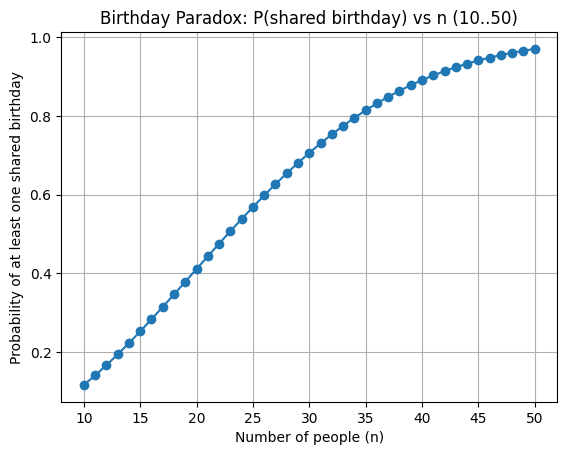

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def p_at_least_one_shared(n, days=365):
    if n <= 1:
        return 0.0
    p_no_match = 1.0
    for k in range(n):
        p_no_match *= (days - k) / days
    return 1.0 - p_no_match

# Compute for n = 10..50
ns = list(range(10, 51))
probs = [p_at_least_one_shared(n) for n in ns]

# Table
df = pd.DataFrame({"n": ns, "P(at least one shared birthday)": probs})
try:
    from caas_jupyter_tools import display_dataframe_to_user
    display_dataframe_to_user("Birthday Paradox Probabilities (n=10..50)", df)
except Exception:
    print(df.head())

# Plot (single chart, default matplotlib settings; no styles/colors specified)
plt.figure()
plt.plot(ns, probs, marker='o')
plt.xlabel('Number of people (n)')
plt.ylabel('Probability of at least one shared birthday')
plt.title('Birthday Paradox: P(shared birthday) vs n (10..50)')
plt.grid(True)
plt.show()

<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

Using **Monte Carlo simulation**:

For each $ n \in \{15, 16, \dots, 30\} $:

1. Simulate many random groups of \( n \) people.  
   Each person’s birthday is drawn uniformly from $\{1, 2, \dots, 365\}$.

2. For each simulation, check if **any two** share a birthday.

3. Compute:
   $$
   \hat{p}_n = \frac{\text{Number of simulations with ≥ 1 shared birthday}}{\text{Total number of simulations}}
   $$

4. Compute the **95 % confidence interval**:
   $$
   \hat{p}_n \pm 1.96 \sqrt{\frac{\hat{p}_n(1 - \hat{p}_n)}{N}}
   $$

where \( N \) is the number of Monte Carlo repetitions.

We then plot:
- Simulation estimates with 95 % CIs
- Theoretical curve from part (a) for comparison

     n  Simulated Probability  95% CI Lower  95% CI Upper  \
0   15                 0.2522        0.2495        0.2548   
1   16                 0.2817        0.2789        0.2844   
2   17                 0.3149        0.3120        0.3178   
3   18                 0.3465        0.3436        0.3495   
4   19                 0.3797        0.3767        0.3827   
5   20                 0.4098        0.4068        0.4129   
6   21                 0.4452        0.4422        0.4483   
7   22                 0.4774        0.4743        0.4805   
8   23                 0.5057        0.5026        0.5088   
9   24                 0.5373        0.5342        0.5404   
10  25                 0.5686        0.5655        0.5717   
11  26                 0.5945        0.5914        0.5975   
12  27                 0.6264        0.6234        0.6294   
13  28                 0.6536        0.6507        0.6566   
14  29                 0.6841        0.6812        0.6870   
15  30                 0

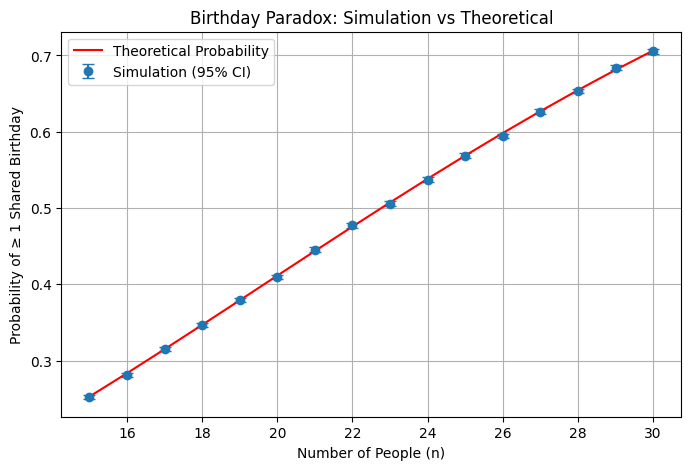

In [ ]:
import numpy as np

# ---------- Theoretical probability function ----------
def p_theoretical(n, days=365):
    """Compute theoretical probability that at least two people share a birthday."""
    if n <= 1:
        return 0.0
    p_no_match = 1.0
    for k in range(n):
        p_no_match *= (days - k) / days
    return 1.0 - p_no_match


# ---------- Simulation parameters ----------
ns = np.arange(15, 31)      # n = 15, 16, ..., 30
num_simulations = 100000    # number of Monte Carlo repetitions

sim_estimates = []
ci_lower = []
ci_upper = []
theoretical = [p_theoretical(n) for n in ns]


# ---------- Monte Carlo simulation ----------
for n in ns:
    count_shared = 0
    for _ in range(num_simulations):
        bdays = np.random.randint(0, 365, size=n)
        if len(np.unique(bdays)) < n:   # at least one shared birthday
            count_shared += 1

    phat = count_shared / num_simulations
    sim_estimates.append(phat)

    # 95% confidence interval
    se = math.sqrt(phat * (1 - phat) / num_simulations)
    ci_lower.append(phat - 1.96 * se)
    ci_upper.append(phat + 1.96 * se)


# ---------- Results table ----------
df = pd.DataFrame({
    "n": ns,
    "Simulated Probability": sim_estimates,
    "95% CI Lower": ci_lower,
    "95% CI Upper": ci_upper,
    "Theoretical Probability": theoretical
})

print(df.round(4))


# ---------- Plot ----------
plt.figure(figsize=(8, 5))
plt.errorbar(ns, sim_estimates,
             yerr=[np.array(sim_estimates) - np.array(ci_lower),
                   np.array(ci_upper) - np.array(sim_estimates)],
             fmt='o', capsize=4, label='Simulation (95% CI)')
plt.plot(ns, theoretical, '-r', label='Theoretical Probability')
plt.xlabel('Number of People (n)')
plt.ylabel('Probability of ≥ 1 Shared Birthday')
plt.title('Birthday Paradox: Simulation vs Theoretical')
plt.legend()
plt.grid(True)
plt.show()

<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

/tmp/ipython-input-1213530647.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('bdaydata.txt', delim_whitespace=True, header=None, names=['day','count'])


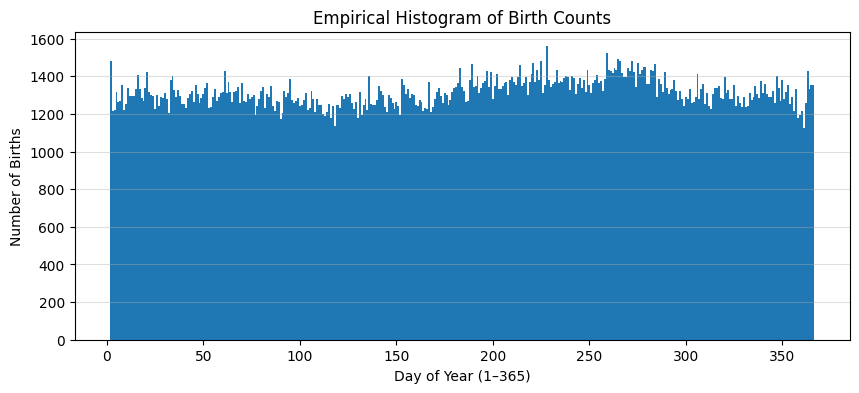

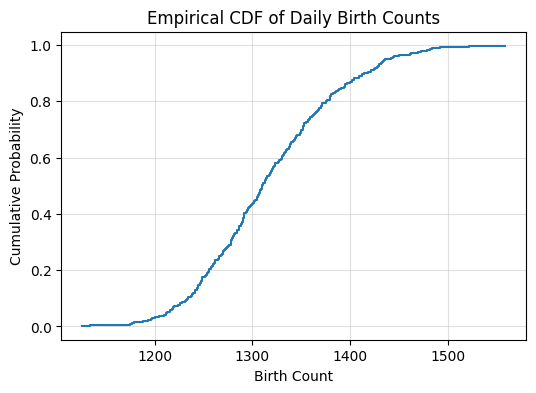

In [ ]:
from scipy import stats
## Plot histogram

data = pd.read_csv('bdaydata.txt', delim_whitespace=True, header=None, names=['day','count'])

# Convert to numeric arrays

data['count'] = pd.to_numeric(data['count'], errors='coerce')
counts = data['count'].values
days = np.arange(1, len(counts)+1)  # 1..365

# ---------- i. Empirical histogram ----------
plt.figure(figsize=(10,4))
plt.bar(days, counts, width=1.0)
plt.title('Empirical Histogram of Birth Counts')
plt.xlabel('Day of Year (1–365)')
plt.ylabel('Number of Births')
plt.grid(True, axis='y', alpha=0.4)
plt.show()

# ---------- ii. Empirical CDF ----------
sorted_counts = np.sort(counts)
cdf = np.arange(1, len(sorted_counts)+1) / len(sorted_counts)

plt.figure(figsize=(6,4))
plt.step(sorted_counts, cdf, where='post')
plt.title('Empirical CDF of Daily Birth Counts')
plt.xlabel('Birth Count')
plt.ylabel('Cumulative Probability')
plt.grid(True, alpha=0.4)
plt.show()



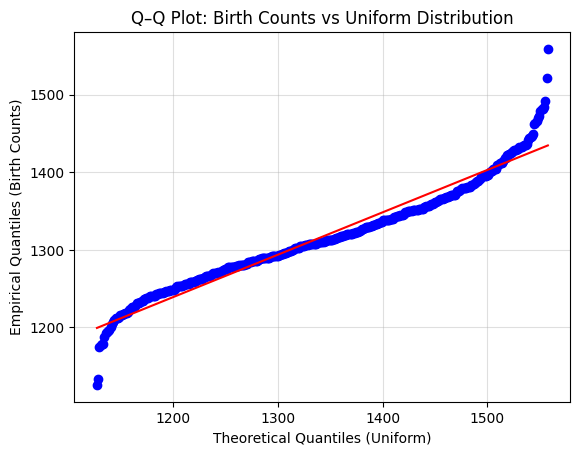

Mean births/day: 1317.03
Std deviation: 69.86
Min: 1126.0,  Max: 1559.0


In [ ]:
## Q-Q plot

counts = pd.to_numeric(data['count'], errors='coerce').dropna().to_numpy()
loc = counts.min()
scale = counts.max() - counts.min()

# Compare to uniform( min(counts), max(counts) )
stats.probplot(counts, dist=stats.uniform, sparams=(min(counts), max(counts)-min(counts)), plot=plt)
plt.title('Q–Q Plot: Birth Counts vs Uniform Distribution')
plt.xlabel('Theoretical Quantiles (Uniform)')
plt.ylabel('Empirical Quantiles (Birth Counts)')
plt.grid(True, alpha=0.4)
plt.show()

print(f"Mean births/day: {counts.mean():.2f}")
print(f"Std deviation: {counts.std():.2f}")
print(f"Min: {counts.min()},  Max: {counts.max()}")


## Ans.

<hr>

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


In [ ]:
## Chi-square test

from scipy.stats import chisquare, kstest, uniform

# --- Clean numeric data again just in case ---
counts = pd.to_numeric(data['count'], errors='coerce').dropna().to_numpy()

# --- (1) Chi-square goodness-of-fit test ---
# Expected count for each day under a uniform model
expected = np.ones_like(counts) * counts.mean()

chi_stat, chi_p = chisquare(f_obs=counts, f_exp=expected)
print("Chi-square test for uniformity:")
print(f"  Test statistic = {chi_stat:.2f}")
print(f"  p-value = {chi_p:.6f}")
if chi_p < 0.05:
    print("  → Reject H0: Birthdays are NOT uniformly distributed.\n")
else:
    print("  → Fail to reject H0: Birthdays could be uniform.\n")



Chi-square test for uniformity:
  Test statistic = 1352.72
  p-value = 0.000000
  → Reject H0: Birthdays are NOT uniformly distributed.



In [ ]:
## K-S test

# Standardize data to [0,1] for uniform(0,1) test
scaled = (counts - counts.min()) / (counts.max() - counts.min())

ks_stat, ks_p = kstest(scaled, 'uniform')
print("Kolmogorov–Smirnov test for uniformity:")
print(f"  Test statistic = {ks_stat:.4f}")
print(f"  p-value = {ks_p:.6f}")
if ks_p < 0.05:
    print("  → Reject H0: Birthdays are NOT uniformly distributed.")
else:
    print("  → Fail to reject H0: Birthdays could be uniform.")


Kolmogorov–Smirnov test for uniformity:
  Test statistic = 0.2429
  p-value = 0.000000
  → Reject H0: Birthdays are NOT uniformly distributed.


<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

## Ans.

Both the uniform model (part b) and bootstrap model (part e) lead to the same qualitative conclusion — the probability of shared birthdays increases rapidly with n — but the bootstrap results are slightly higher, reflecting real-world clustering of birthdays.

Hence, using actual birth distributions makes the “birthday paradox” even more likely than the classic uniform assumption

/tmp/ipython-input-1891659246.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("bdaydata.txt", delim_whitespace=True, header=None, names=["day", "count"])


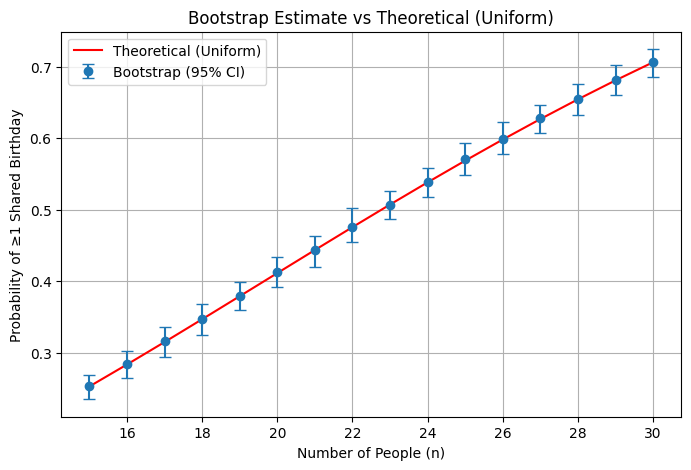

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("bdaydata.txt", delim_whitespace=True, header=None, names=["day", "count"])
counts = pd.to_numeric(data["count"], errors="coerce").dropna().values

# Normalize to probability distribution
p = counts / counts.sum()

# Parameters
num_bootstrap = 200       # bootstraps
num_sims = 2000           # Monte Carlo simulations per bootstrap
ns = np.arange(15, 31)

def simulate_shared_probability(n, probs, num_sims=2000):
    draws = np.random.choice(len(probs), size=(num_sims, n), replace=True, p=probs)
    duplicates = np.any(np.apply_along_axis(lambda x: len(np.unique(x)) < len(x), 1, draws))
    # The above returns True for each row with any duplicate — so count and average
    return np.mean([len(np.unique(row)) < len(row) for row in draws])

# Bootstrap storage
boot_results = np.zeros((num_bootstrap, len(ns)))

for b in range(num_bootstrap):
    boot_counts = np.random.choice(counts, size=len(counts), replace=True)
    boot_probs = boot_counts / boot_counts.sum()
    for i, n in enumerate(ns):
        boot_results[b, i] = simulate_shared_probability(n, boot_probs, num_sims)

# Compute mean and 95% CI
prob_estimates = boot_results.mean(axis=0)
ci_lower = np.percentile(boot_results, 2.5, axis=0)
ci_upper = np.percentile(boot_results, 97.5, axis=0)

# Theoretical curve
def p_theoretical(n, days=365):
    p_no_match = np.prod([(days - k) / days for k in range(n)])
    return 1 - p_no_match

theoretical = [p_theoretical(n) for n in ns]

# Plot
plt.figure(figsize=(8, 5))
plt.errorbar(ns, prob_estimates,
             yerr=[prob_estimates - ci_lower, ci_upper - prob_estimates],
             fmt='o', capsize=4, label='Bootstrap (95% CI)')
plt.plot(ns, theoretical, '-r', label='Theoretical (Uniform)')
plt.xlabel('Number of People (n)')
plt.ylabel('Probability of ≥1 Shared Birthday')
plt.title('Bootstrap Estimate vs Theoretical (Uniform)')
plt.legend()
plt.grid(True)
plt.show()

<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.

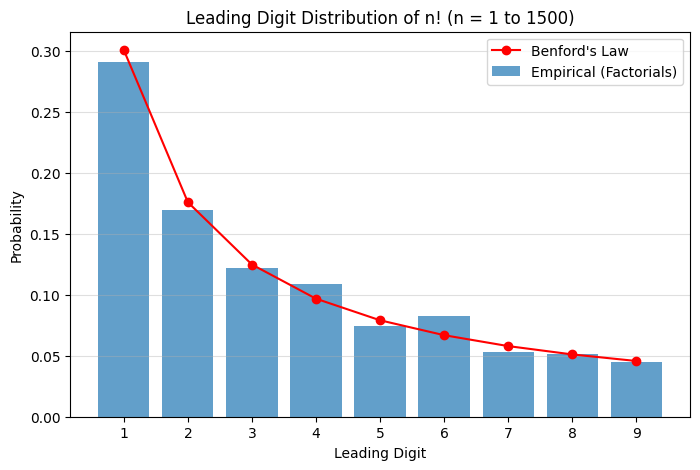

In [11]:
from scipy.special import factorial
import matplotlib.pyplot as plt
import numpy as np
n = 1500
fact_series = factorial(np.arange(1, n+1), exact=True)
first_digit = np.zeros(n, dtype=int)
for i in range(n):
 first_digit[i] = int(str(fact_series[i])[0])

unique, counts = np.unique(first_digit, return_counts=True)
empirical_probs = counts / np.sum(counts)

benford_probs = np.log10(1 + 1 / np.arange(1, 10))

plt.figure(figsize=(8,5))
plt.bar(unique, empirical_probs, alpha=0.7, label='Empirical (Factorials)')
plt.plot(np.arange(1,10), benford_probs, 'ro-', label="Benford's Law")
plt.xticks(np.arange(1,10))
plt.xlabel('Leading Digit')
plt.ylabel('Probability')
plt.title("Leading Digit Distribution of n! (n = 1 to 1500)")
plt.legend()
plt.grid(True, axis='y', alpha=0.4)
plt.show()


<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

## Ans.

In [12]:
from scipy.stats import chisquare

# Observed counts from part (a)
observed = counts

# Expected counts under uniform distribution (equal for all 9 digits)
expected = np.ones(9) * (np.sum(observed) / 9)

# Chi-square test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square Test for Uniform Distribution (Digits 1–9):")
print(f"  Test statistic = {chi_stat:.4f}")
print(f"  p-value = {p_value:.6e}")

if p_value < 0.05:
    print("  → Reject H₀: The first digits are NOT uniformly distributed.")
else:
    print("  → Fail to reject H₀: The digits could be uniform.")

Chi-square Test for Uniform Distribution (Digits 1–9):
  Test statistic = 667.5120
  p-value = 7.041358e-139
  → Reject H₀: The first digits are NOT uniformly distributed.


<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


<hr>

In [13]:
# Observed counts from part (a)
observed = counts

# Expected probabilities from Benford's Law
benford_probs = np.log10(1 + 1 / np.arange(1, 10))

# Expected counts under Benford's Law
expected_benford = benford_probs * np.sum(observed)

# Chi-square test
chi_stat_benford, p_value_benford = chisquare(f_obs=observed, f_exp=expected_benford)

print("Chi-square Test for Benford's Law:")
print(f"  Test statistic = {chi_stat_benford:.4f}")
print(f"  p-value = {p_value_benford:.6e}")

if p_value_benford < 0.05:
    print("  → Reject H₀: The first digits do NOT perfectly follow Benford’s Law.")
else:
    print("  → Fail to reject H₀: The digits are consistent with Benford’s Law.")

Chi-square Test for Benford's Law:
  Test statistic = 9.7683
  p-value = 2.816673e-01
  → Fail to reject H₀: The digits are consistent with Benford’s Law.


<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

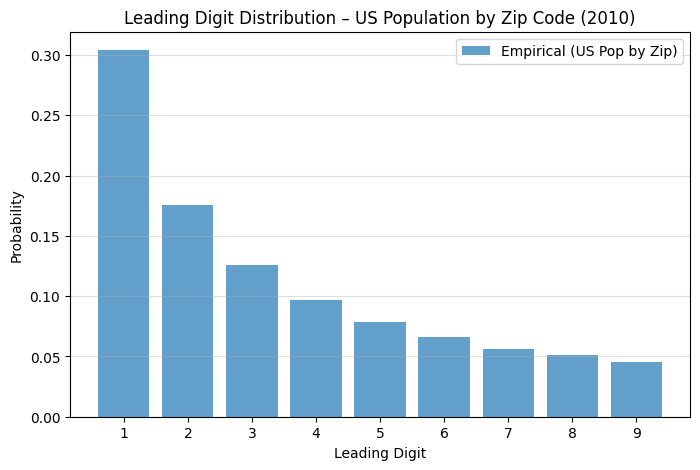

Chi-square Test vs Uniform Distribution:
  Test statistic = 50323.5357
  p-value = 0.000000e+00
  → Reject H₀: The digits are NOT uniformly distributed.

Chi-square Test vs Benford’s Law:
  Test statistic = 11.8432
  p-value = 1.583370e-01
  → Fail to reject H₀: The digits are consistent with Benford’s Law.


In [14]:
import pandas as pd

data = pd.read_csv("us_pop.csv")

# If the column name is unknown, find the numeric column automatically
numeric_cols = data.select_dtypes(include=[np.number]).columns
pop = data[numeric_cols[0]].dropna().astype(float).values

# ---------- Extract leading digits ----------
def leading_digit(x):
    x = abs(x)
    if x == 0:
        return np.nan
    while x < 1:
        x *= 10
    return int(str(x)[0])

first_digits = np.array([leading_digit(x) for x in pop if x > 0 and not np.isnan(x)])
unique, counts = np.unique(first_digits, return_counts=True)
empirical_probs = counts / counts.sum()

# ---------- Plot histogram ----------
plt.figure(figsize=(8,5))
plt.bar(unique, empirical_probs, alpha=0.7, label='Empirical (US Pop by Zip)')
plt.xlabel('Leading Digit')
plt.ylabel('Probability')
plt.title('Leading Digit Distribution – US Population by Zip Code (2010)')
plt.xticks(np.arange(1,10))
plt.grid(True, axis='y', alpha=0.4)
plt.legend()
plt.show()

# ---------- (1) Chi-square test – Uniform ----------
expected_uniform = np.ones(9) * (np.sum(counts) / 9)
chi_stat_uni, p_uni = chisquare(f_obs=counts, f_exp=expected_uniform)

print("Chi-square Test vs Uniform Distribution:")
print(f"  Test statistic = {chi_stat_uni:.4f}")
print(f"  p-value = {p_uni:.6e}")
if p_uni < 0.05:
    print("  → Reject H₀: The digits are NOT uniformly distributed.\n")
else:
    print("  → Fail to reject H₀: Could be uniform.\n")

# ---------- (2) Chi-square test – Benford ----------
benford_probs = np.log10(1 + 1 / np.arange(1, 10))
expected_benford = benford_probs * np.sum(counts)
chi_stat_ben, p_ben = chisquare(f_obs=counts, f_exp=expected_benford)

print("Chi-square Test vs Benford’s Law:")
print(f"  Test statistic = {chi_stat_ben:.4f}")
print(f"  p-value = {p_ben:.6e}")
if p_ben < 0.05:
    print("  → Reject H₀: The digits do NOT perfectly follow Benford’s Law.")
else:
    print("  → Fail to reject H₀: The digits are consistent with Benford’s Law.")

**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.

In [ ]:











AVR